Source: https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial
Amazon Food Reviews

In [ ]:
#!pip install nltk
"""nltk.org If you publish work that uses NLTK, please cite the NLTK book as follows:
#Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. OReilly Media Inc."""
#%pip install --upgrade jupyter ipywidgets
#%pip install --upgrade tqdm
#%pip install hf_xet
#%pip install transformers
#%pip install tensorflow
#%pip install --upgrade --no-deps --force-reinstall torch
#%pip install tf-keras


'nltk.org If you publish work that uses NLTK, please cite the NLTK book as follows:\n#Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. OReilly Media Inc.'

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import nltk

plt.style.use('ggplot')

In [11]:
df = pd.read_csv('raw_data/Reviews.csv')

In [12]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
print(df.shape)

(568454, 10)


Esta é a coluna a ser processada para análise de sentimento

In [14]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

A base completa tem mais de 500 mil observações. Para efeito de validação, vamos limitar a 500 amostras

In [15]:
df = df.head(500)
print(df.shape)

(500, 10)


Vamos fazer um pouco de análise exploratória de dados. Primeiro a distribuição de frequência das classes na coluna SCORE

In [16]:
df['Score'].value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

Text(0.5, 0, 'Revisões (Estrelas)')

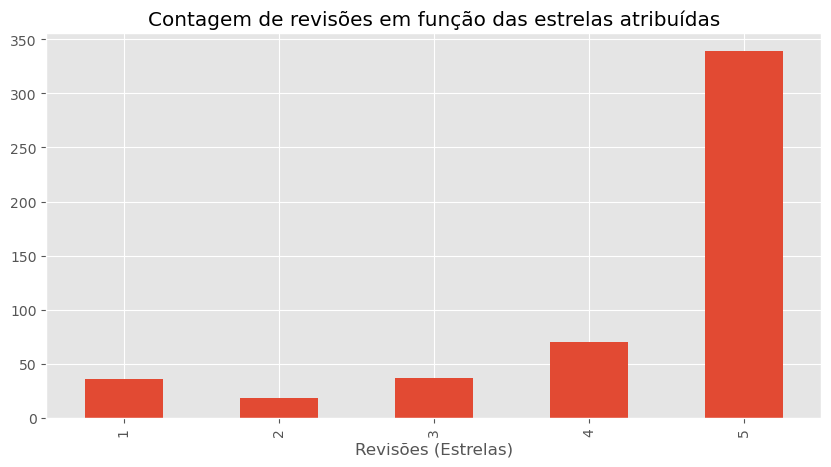

In [17]:
ax = df['Score'].value_counts().sort_index()\
    .plot(kind='bar', title='Contagem de revisões em função das estrelas atribuídas', 
    figsize=(10,5))
ax.set_xlabel('Revisões (Estrelas)')

Vamos fazer um simples exemplo com a NLTK

In [18]:
some_example = df['Text'][30]
print(some_example)

I have never been a huge coffee fan. However, my mother purchased this little machine and talked me into trying the Latte Macciato. No Coffee Shop has a better one and I like most of the other products, too (as a usually non-coffee drinker!).<br />The little Dolche Guesto Machine is super easy to use and prepares a really good Coffee/Latte/Cappuccino/etc in less than a minute (if water is heated up). I would recommend the Dolce Gusto to anyone. Too good for the price and I'am getting one myself! :)


In [19]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\josen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
tokens = nltk.word_tokenize(some_example, language="portuguese") #usa o punkt_tab
tokens[:10]

['I', 'have', 'never', 'been', 'a', 'huge', 'coffee', 'fan', '.', 'However']

A NLTK permite associar a cada token sua categoria (POS_TAG)

In [21]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\josen\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [22]:
tagged = nltk.pos_tag(tokens) #usa o averaged_perceptron_tagger PART OF SPEECH (análise sintática - categoria)
tagged[:10]

[('I', 'PRP'),
 ('have', 'VBP'),
 ('never', 'RB'),
 ('been', 'VBN'),
 ('a', 'DT'),
 ('huge', 'JJ'),
 ('coffee', 'NN'),
 ('fan', 'NN'),
 ('.', '.'),
 ('However', 'RB')]

In [23]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\josen\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\josen\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [24]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  have/VBP
  never/RB
  been/VBN
  a/DT
  huge/JJ
  coffee/NN
  fan/NN
  ./.
  However/RB
  ,/,
  my/PRP$
  mother/NN
  purchased/VBD
  this/DT
  little/JJ
  machine/NN
  and/CC
  talked/VBD
  me/PRP
  into/IN
  trying/VBG
  the/DT
  (ORGANIZATION Latte/NNP Macciato/NNP)
  ./.
  (PERSON No/NNP Coffee/NNP Shop/NNP)
  has/VBZ
  a/DT
  better/JJR
  one/CD
  and/CC
  I/PRP
  like/VBP
  most/JJS
  of/IN
  the/DT
  other/JJ
  products/NNS
  ,/,
  too/RB
  (/(
  as/IN
  a/DT
  usually/RB
  non-coffee/JJ
  drinker/NN
  !/.
  )/)
  ./.
  </JJ
  br/NN
  //NNP
  >/VBZ
  The/DT
  little/JJ
  (PERSON Dolche/NNP Guesto/NNP Machine/NNP)
  is/VBZ
  super/JJ
  easy/JJ
  to/TO
  use/VB
  and/CC
  prepares/VBZ
  a/DT
  really/RB
  good/JJ
  Coffee/Latte/Cappuccino/etc/NNP
  in/IN
  less/JJR
  than/IN
  a/DT
  minute/NN
  (/(
  if/IN
  water/NN
  is/VBZ
  heated/VBN
  up/RP
  )/)
  ./.
  I/PRP
  would/MD
  recommend/VB
  the/DT
  (ORGANIZATION Dolce/NNP Gusto/NNP)
  to/TO
  anyone/NN
  ./.
  To

A primeira abordagem de cunho didático é a VADER: Valence Aware Dictionary and sEntiment Reasoner, que associa cada palavra a um score entre NEG, NEU, POS e conclui sobre o sentimento daquele texto<br>
Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.<br>

Remove stop words (bag of words)

In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [26]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\josen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [52]:
model = SentimentIntensityAnalyzer()

In [28]:
model.polarity_scores('I am a kind of happy')

{'neg': 0.0, 'neu': 0.468, 'pos': 0.532, 'compound': 0.5279}

In [29]:
model.polarity_scores('this is the worst day of may life')

{'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249}

In [30]:
model.polarity_scores(some_example)

{'neg': 0.041, 'neu': 0.692, 'pos': 0.267, 'compound': 0.9713}

In [53]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = model.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

Criamos um dicionário com os scores. Vamos organizar melhor em um df e unir com o df original usando o Id como key para o left join

In [54]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [35]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0.5, 1.0, 'Compound Score dos Reviews da Amazon')

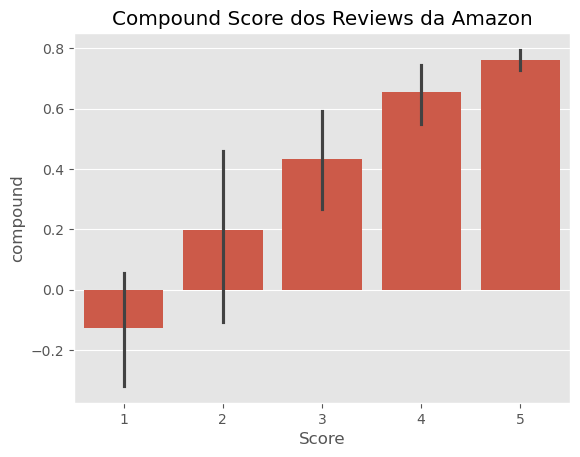

In [36]:
ax = sb.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score dos Reviews da Amazon')

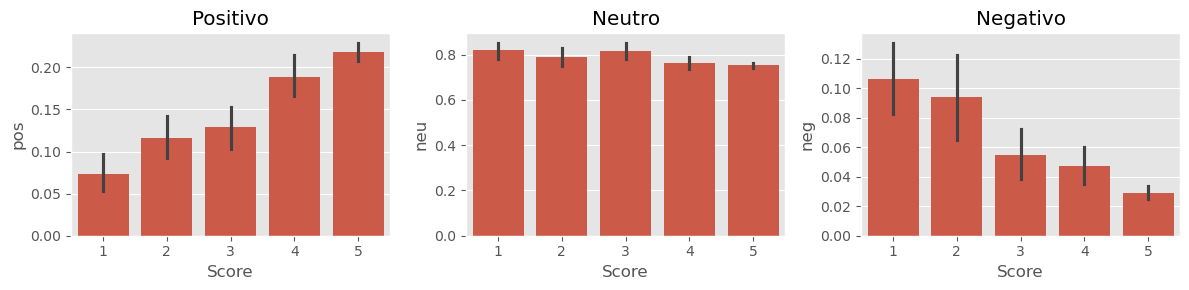

In [37]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
sb.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sb.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sb.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positivo')
axs[1].set_title('Neutro')
axs[2].set_title('Negativo')
plt.tight_layout()
plt.show()

### Análise de sentimentos depende do contexto. VADERS não usa contexto. Vamos usar TRANSFORMERS do huggingface

In [41]:
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Transfer Learning de dataset treinado com posts no X: hugging face roBERTa<br>
This is a roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. This model is suitable for English (for a similar multilingual model, see XLM-T).<br>


In [51]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
modelBERT = AutoModelForSequenceClassification.from_pretrained(MODEL) #requires torch

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\huggingface_hub\file_download.py:799: UserWarning: Not enough free disk space to download the file. The expected file size is: 500.98 MB. The target location C:\Users\josen\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment-latest\blobs only has 0.00 MB free disk space.
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   8%|7         | 41.9M/543M [00:00<?, ?B/s]

In [45]:
encoded_text = tokenizer(some_example, return_tensors='pt') #mecanismo de atenção

In [55]:
output = modelBERT(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roBERTa_neg': scores[0],
    'roBERTa_neu': scores[1],
    'roBERTa_pos': scores[2]
}
print(scores_dict)

{'roBERTa_neg': 0.0069834543, 'roBERTa_neu': 0.052528825, 'roBERTa_pos': 0.94048774}


In [63]:
def polarity_scores_roBERTa(example):
    encoded_text = tokenizer(some_example, return_tensors='pt') #mecanismo de atenção
    output = modelBERT(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roBERTa_neg': scores[0],
        'roBERTa_neu': scores[1],
        'roBERTa_pos': scores[2]
    }
    return scores_dict

In [68]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = model.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f'vader_{key}'] = value
        roberta_result =  polarity_scores_roBERTa(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Error on Id {myid}')
    
    #break

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
#res

{1: {'vader_neg': 0.0,
  'vader_neu': 0.695,
  'vader_pos': 0.305,
  'vader_compound': 0.9441,
  'roBERTa_neg': 0.0069834543,
  'roBERTa_neu': 0.052528825,
  'roBERTa_pos': 0.94048774}}

In [69]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')

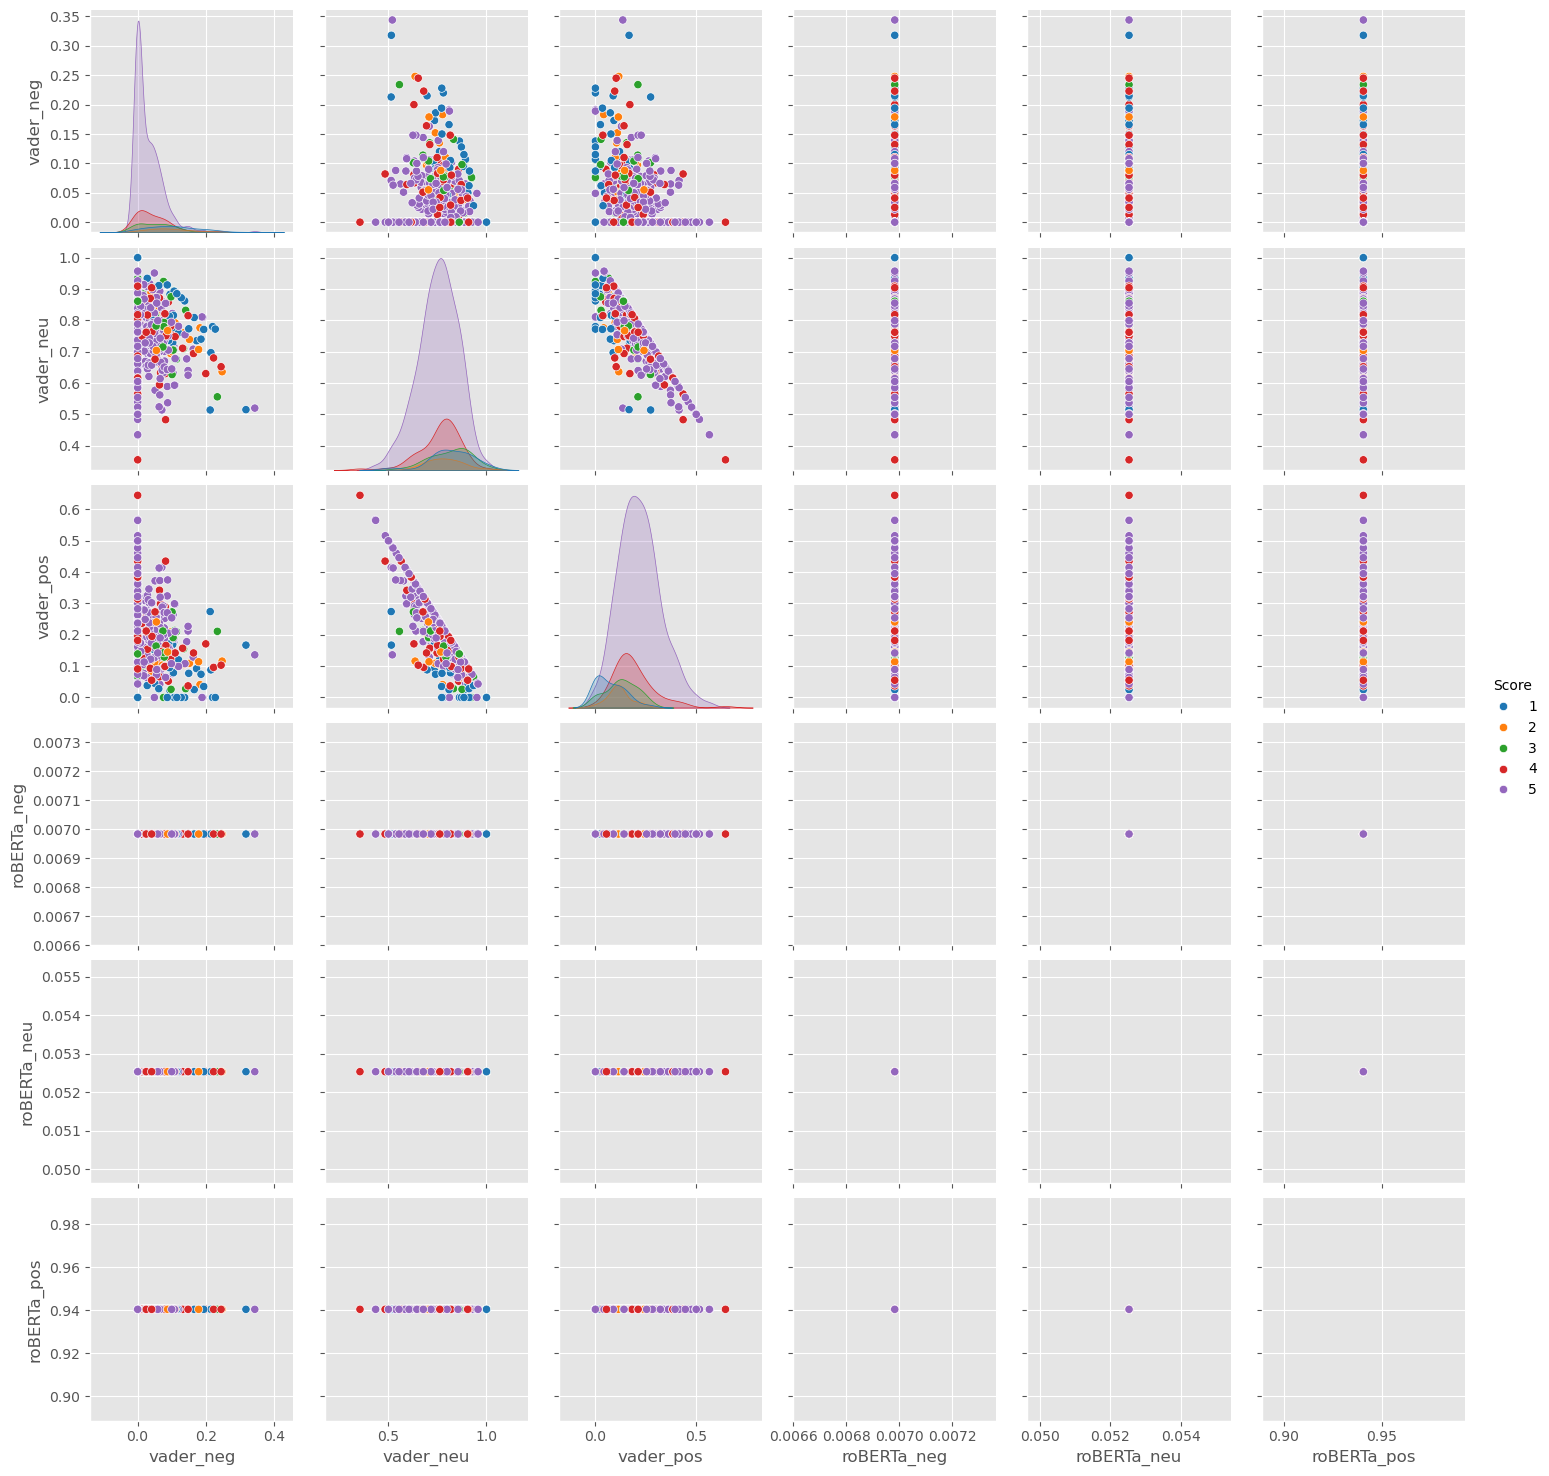

In [71]:
sb.pairplot(data=results_df,
            vars=['vader_neg', 'vader_neu', 'vader_pos',
                 'roBERTa_neg','roBERTa_neu','roBERTa_pos'],
            hue='Score',
            palette='tab10')
plt.show()

Dando uma olhada nos erros do modelo POS 1 estrela e NEG 5 estrelas

In [74]:
results_df.query('Score==1').sort_values('roBERTa_pos', ascending=False)['Text'].values[0]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [75]:
results_df.query('Score==1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [77]:
#sentimento negativo com revisão de 5
results_df.query('Score==5').sort_values('roBERTa_neg', ascending=False)['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [78]:
#sentimento negativo com revisão de 5
results_df.query('Score==5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

Transformers Pipeline

In [79]:
from transformers import pipeline

In [85]:
sent_pipeline = pipeline('sentiment-analysis',model='cardiffnlp/twitter-roberta-base-sentiment-latest')

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\huggingface_hub\file_download.py:799: UserWarning: Not enough free disk space to download the file. The expected file size is: 500.98 MB. The target location C:\Users\josen\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment-latest\blobs only has 15.46 MB free disk space.
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   8%|7         | 41.9M/543M [00:00<?, ?B/s]

In [88]:
sent_pipeline('I love machine learning')

[{'label': 'positive', 'score': 0.9794053435325623}]